# Zackary Nielsen

**EDA**
**Step 1: describe dataset**

The dataset chosen came from data.world, provided by user Chris Awram. Awram collected and combined data from three primary sources: fatalencounters.org, gunviolencearchive.org, and github.com/washingtonpost/data-police-shootings. The dataset is titled "US Police Involved Fatalities" and it has information on individuals who were killed during alteractions with US police. Data has 12 columns or variables: UID (identification number), name, age, gender, race, date, city, state, manner of death, whether they were armed, mental illness, and if they were fleeing. The 12491 rows/occurrences in the dataset were collected across years 2000-2016. This dataset's purpose is to uncover insights about individuals which have been killed by US police. The inclusion of variables such as race, mental_illness, and gender may provide interesting insights into "risk-factors" which may increase the chance of an individual experinceing a fatal police interaction. This dataset's primary purpose is public knowledge about police fatalities, which may result in increased levels of transparency and accountability for law enforcement. How the data was collected is not entirely clear. I speculate Awram collected the data from primary historical records (digitized) and then combined them into the final dataset. 

In [ ]:
#packages 

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


**EDA Step 2: Load data**

In [ ]:
pd.__version__


'1.4.4'

In [ ]:
df = pd.read_csv('../data/raw/data.csv',encoding="ISO-8859-1")


**EDA Step 3: Explore data**

In [ ]:
#Data types 

df.info() 
type(df) #dataset: pandas.core.frame.DataFrame

#my variables of interest: Age (float64), Mental_illness (boolean), Flee (boolean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UID              12491 non-null  int64  
 1   Name             12491 non-null  object 
 2   Age              12258 non-null  float64
 3   Gender           12483 non-null  object 
 4   Race             8526 non-null   object 
 5   Date             12491 non-null  object 
 6   City             12487 non-null  object 
 7   State            12491 non-null  object 
 8   Manner_of_death  12491 non-null  object 
 9   Armed            6814 non-null   object 
 10  Mental_illness   12491 non-null  bool   
 11  Flee             12491 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 1000.4+ KB


pandas.core.frame.DataFrame

In [ ]:
#Shape (rows and colunms) of Dataset and Column Names

df.shape, df.columns 

((12491, 12),
 Index(['UID', 'Name', 'Age', 'Gender', 'Race', 'Date', 'City', 'State',
        'Manner_of_death', 'Armed', 'Mental_illness', 'Flee'],
       dtype='object'))

In [ ]:
# Dataset Preview

df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False


In [ ]:
# Number of unique responses per variable

df.nunique() 

# 92 unique age values
# Both Mental_illness & Flee have 2 unique values (boolean)

UID                12488
Name               11354
Age                   92
Gender                 2
Race                   6
Date                4848
City                3327
State                 51
Manner_of_death        4
Armed                 59
Mental_illness         2
Flee                   2
dtype: int64

In [ ]:
# Descriptive summary of Age

df["Age"].describe()

#the min(1.0) and max(107.0) of Age is concerning; check if the extremes are outliers in the Wrangling step 

count    12258.000000
mean        35.269538
std         12.979532
min          1.000000
25%         25.000000
50%         33.000000
75%         44.000000
max        107.000000
Name: Age, dtype: float64

In [ ]:
#Median of Age
df["Age"].median()

33.0

In [ ]:
print(sum(df['Age']==1)) 

# 5 individuals at age 1 exist

5


In [ ]:
print(sum(df['Age']==107), sum(df['Age']==106)) 

# 1 individuals at age 107 exists (likely there are outliers on the high side of age)

1 0


In [ ]:
 #count of age data points under the approximate mean (35)
    
print(sum(df['Age']<35)) 

6603


In [ ]:
#Count of Individuals with age less than 10 

print(sum(df['Age']<10))

20


In [ ]:
#Count of Individuals with age greater than 90

print(sum(df['Age']>90))

# less common than age<10

4


In [ ]:
# Occurences of Mental_illness in dataset

df[df["Mental_illness"]==True]["Mental_illness"].value_counts(), df[df["Mental_illness"]==False]["Mental_illness"].value_counts()

# could also use: df['Mental_illness'].describe(), but my code returns both the True, False counts 

# initially, n=9862 individuals were not labeled as having mental illness. 
# intially, n=2629 Indivdiuals labeled as having mental illness. 

(True    2629
 Name: Mental_illness, dtype: int64,
 False    9862
 Name: Mental_illness, dtype: int64)

In [ ]:
# Proportions for Mental_illness 

df['Mental_illness'].value_counts(normalize=True) 

# Initially, ~78.95% are False for mental_illness 
# Initially, ~21.05% are True for mental_illness  

False    0.789528
True     0.210472
Name: Mental_illness, dtype: float64

In [ ]:
# Occurences of Flee in dataset

df[df["Flee"]==True]["Flee"].value_counts(), df[df["Flee"]==False]["Flee"].value_counts()

# initially, a very small portion of individuals fled police, n=560
# initially, most individuals did not flee police, n=11931

(True    560
 Name: Flee, dtype: int64,
 False    11931
 Name: Flee, dtype: int64)

In [ ]:
# Proportions for Flee

df['Flee'].value_counts(normalize=True) 

# Initially, ~95.50% are false for Flee 
# Initially, ~4.50% are True for Flee

False    0.955168
True     0.044832
Name: Flee, dtype: float64

**EDA Step 4: Initial Thoughts**

**I will split my thoughts by variable:**

***Age:*** 
Range of 1-107. M = 35.27, SD = 12.98. 
The range is slightly concerning, with values such as age= 1, 107. When checking the occurence of the min/max values, numerous occurences of min values existed (age 1 = 5 occurences) but the max values appeared to look like possible outliers  (age 107 = 1 occurence, age 106 = 0 occurence). 92 different age values were reported. The IQR of variable age is tight (.75 = 44, .25 = 25) so we expect there to be outliers by that convention. Only 4 indiviuals had an age greater than 90, while 20 individuals had age less than 10. 

***Mental_illness:***
9862 individuals did not have mental_illness, 2629 individuals did have mental illness. 
Proportions: mental_illness=True ~21.05%; mental_illness=False ~78.95%.
The higher proportion of mental illness in this population is not suprising, as we are looking at police fatalities. It is likely that the proportion of individuals killed by police has a high representation of mental illness because mental illness may ***i)*** influence the individuals' behaviour to be more problematic for police and ***ii)*** influence perceptions and interactions with law enforcement. I expected the proportion of individuals with mental illness to be higher.

***Flee:***
560 individuals fled police (very little) compared to 11931 individuals who do not flee.
Proportions: Flee=True ~4.50%; Flee=False ~95.50%.
It makes sense that the majority of individuals did not flee from police. These proportions are similar to what i initiallly predicted. 

**EDA Step 5: Wrangle data**

***Age***

In [ ]:
# Function that Calculates Outliers

def find_outliers_IQR(df):

    """This function calculates the outliers of a df"""

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [ ]:
# Find Outliers in Age

outliers = find_outliers_IQR(df['Age'])

print('number of outliers: '+ str(len(outliers))) # amount of outliers

print('max outlier value: '+ str(outliers.max())) # largest outlier

print('min outlier value: '+ str(outliers.min())) # smallest outlier 

outliers #Age outliers: 
            #No outliers on the lower side of age  
            #122 outliers existed in the range 73:107 

number of outliers: 122
max outlier value: 107.0
min outlier value: 73.0


170      76.0
241      88.0
420      78.0
467      74.0
581      92.0
         ... 
12126    86.0
12128    76.0
12134    77.0
12200    86.0
12428    77.0
Name: Age, Length: 122, dtype: float64

In [ ]:
#Function to Drop Outliers and Create a new df which Replaces Outliers with NULL Value 

def drop_outliers_IQR(df):

   """This function replaces outliers with null value"""

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return not_outliers

In [ ]:
# Age category with outliers = NaN 
    
filtered_age = drop_outliers_IQR(df['Age'])

filtered_age

0        44.0
1        26.0
2        36.0
3        29.0
4        25.0
         ... 
12486     NaN
12487    48.0
12488    38.0
12489    41.0
12490    39.0
Name: Age, Length: 12369, dtype: float64

In [ ]:
# Add the altered Age Catgeory 

df['filtered_age'] = filtered_age
df.head()

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0


In [ ]:
# Delete the old age category 

del df['Age']

In [ ]:
#View

df.head()

,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0


In [ ]:
#Filtered Age Descriptive Statistics

filtered_age.describe() 
 

count    12136.000000
mean        34.829515
std         12.263318
min          1.000000
25%         25.000000
50%         33.000000
75%         43.000000
max         72.000000
Name: Age, dtype: float64

In [ ]:
# Check Dataset Changes 

df.head() #should see a column named "filtered_age" and no "Age" category


,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0


In [ ]:
print(type(df['filtered_age']))

<class 'pandas.core.series.Series'>


In [ ]:
#drop NaN's of filtered_age

df = df.dropna(subset = ['filtered_age'])
df

,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12484,13094,Christopher Davis,Male,NaN,3/14/2011,Los Angeles,CA,Tasered,NaN,False,False,36.0
12487,12429,Gene Lovell Ford,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False,48.0
12488,12430,Jose Vega,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False,38.0
12489,12636,Humberto Torres,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False,41.0


In [ ]:
#check NaN vaues are removed by using iloc on their past location

#eg:
print(df.iloc[170, 11]), print(df.iloc[241, 11]) 


45.0
19.0


(None, None)

In [ ]:
#Add an Age Group column 

df['Age_Group'] = pd.cut(df['filtered_age'], bins=[0, 18, 25, 35, 45, 55, 65, float('Inf')],
                         labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

#save modified version
#df.to_csv('mod_data.csv', index=False) 

In [ ]:
#Load in data with modified Age

df =  pd.read_csv('../data/processed/mod_data.csv',encoding="ISO-8859-1")
df.head()

,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age,Age_Group
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0,35-45
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0,25-35
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0,35-45
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0,25-35
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0,18-25


In [ ]:
#the row sum is less now because we removed some data points 

df.shape 

(12136, 13)

In [ ]:
df.head()

,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age,Age_Group
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0,35-45
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0,25-35
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0,35-45
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0,25-35
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0,18-25


***Flee***

In [ ]:
#check for missing data 

df['Flee'].isna().sum()

#we get 0 missing data. Makes sense for this category, they would likely note whether they fled or not.

0

In [ ]:
#Counts of those who fled (True), didnt flee (False)

print(sum(df['Flee']==True), sum(df['Flee']==False)) 

553 11583


In [ ]:
# the sum of the two categories matches the # of data points,  confirms no missing data

print(sum(df['Flee']==True) + sum(df['Flee']==False)) 

12136


In [ ]:
#Re-Do proportions with modified data

df['Flee'].value_counts(normalize=True) 
 
    #percentages of no flee(False), flee(True) 
    #Only 4.5% of individals fled, the other 95.5% didn't 
    #not a significant difference

False    0.954433
True     0.045567
Name: Flee, dtype: float64

***Mental_illness***

In [ ]:
#Check for missing data

df['Mental_illness'].isna().sum()

# 0 missing data for mental illness column. 
#Probably because this is a boolean and anyone who wasn't initally labeled as having mental illness was given a 'False'

0

In [ ]:
#sum of the individuals who were labeled with/without mental illness

print(sum(df['Mental_illness']==True), sum(df['Mental_illness']==False))

2563 9573


In [ ]:
#sum of the two categories matches the # of data points,  confirms no missing data

print(sum(df['Mental_illness']==True) + sum(df['Mental_illness']==False))

12136


In [ ]:
#Re-Do proportions of those with/without mental_illness with modified data

df['Mental_illness'].value_counts(normalize=True) 

#with mental_illness = 21.11%
#without mental_illness =  78.89% 
#more change than seen with "Flee" but still very small

False    0.78881
True     0.21119
Name: Mental_illness, dtype: float64

**EDA Step 6: Research Questions**

Research Q1: What are the prevalences of mental illness across age groups?

Research Q2: Will older individuals flee less often from police than younger individuals?

Research Q3: For what age groups is fleeing the police most common for those with/without mental illness?


**EDA Step 7: Data Analyses and Visualization**

In [ ]:
#load data 

df =  pd.read_csv('../data/processed/mod_data.csv',encoding="ISO-8859-1")
df

,UID,Name,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age,Age_Group
0,133,Karen O. Chin,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0,35-45
1,169,Chyraphone Komvongsa,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0,25-35
2,257,Ming Chinh Ly,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0,35-45
3,483,Kinh Quoc Dao,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0,25-35
4,655,Vanpaseuth Phaisouphanh,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12131,13094,Christopher Davis,Male,NaN,3/14/2011,Los Angeles,CA,Tasered,NaN,False,False,36.0,35-45
12132,12429,Gene Lovell Ford,Male,NaN,8/6/2008,Sacramento,CA,Other,NaN,True,False,48.0,45-55
12133,12430,Jose Vega,Male,NaN,8/6/2008,Visalia,CA,Other,NaN,True,False,38.0,35-45
12134,12636,Humberto Torres,Male,NaN,3/21/2009,Delano,CA,Other,Gun,False,False,41.0,35-45


[Text(0.5, 1.0, 'Prevalence of Mental Illness across Age Groups of Police Fatality Victims'),
 Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Count of Cases')]

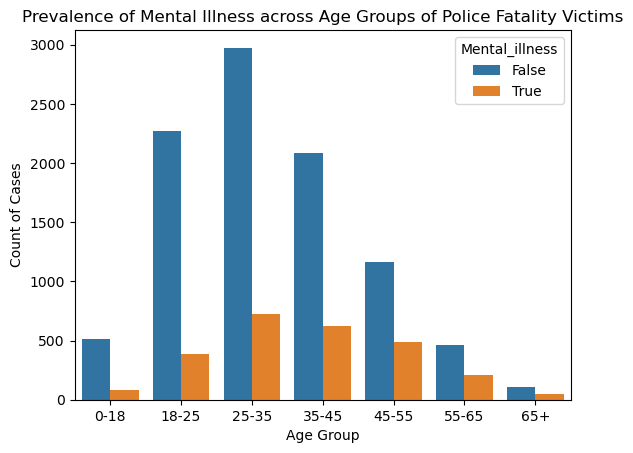

In [ ]:
sns.countplot(data = df, x = 'Age_Group', hue = 'Mental_illness', 
              order = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']).set(title='Prevalence of Mental Illness across Age Groups of Police Fatality Victims', 
                                                                                  xlabel='Age Group', ylabel='Count of Cases')

I used a countplot to visualize the prevalence of mental illness across age groups because it allowed me to put age groups on the x axis and get the associated counts on the y axis. Countplots work great for comparing counts of categorical variables. The hue argument allowed me to compare those with/without mental illness in the same age group side by side. This plot does a good job at clearly displaying the occurence of mental illness within each age group. 

[Text(0.5, 1.0, 'Prevalence of Victims who Fled from Police across Age Groups'),
 Text(0.5, 0, 'Count of Cases')]

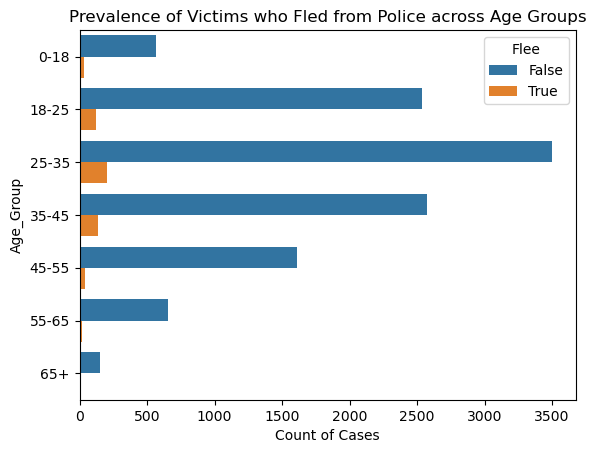

In [ ]:
sns.countplot(data = df, y = 'Age_Group', hue = 'Flee', order = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']).set(title='Prevalence of Victims who Fled from Police across Age Groups', 
                                                                                  xlabel='Count of Cases')


I used the countplot to visualize the occurences of fleeing from police in each age group. As with the plot above, i am interested in the counts of a categorical variable (flee). The countplot allowed me to compare the rates of fleeing/non-fleeing in each age group, side by side. This plot clearly visualizes how flee attempts are most common in the 25-35 age group and less so in more young and more old age groups. 

[Text(0.5, 1.0, 'FLeeing Patterns of Victims With or Without Mental Illness, Indexed by Age'),
 Text(0.5, 0, 'Did the Victim Flee Police?'),
 Text(0, 0.5, 'Age')]

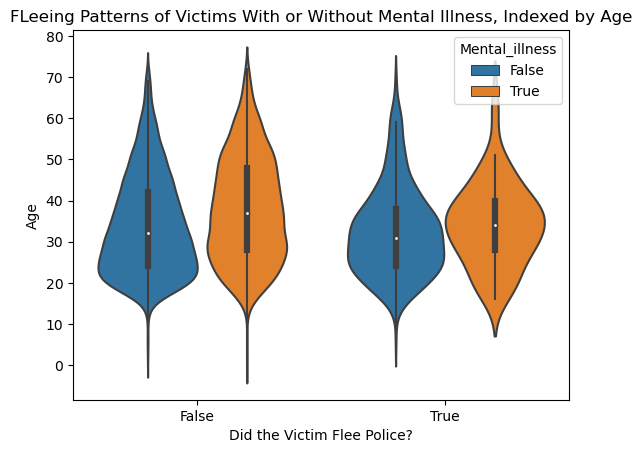

In [ ]:
sns.violinplot(x='Flee',y='filtered_age', hue="Mental_illness", data=df).set(title='FLeeing Patterns of Victims With or Without Mental Illness, Indexed by Age', 
                                                                                  xlabel='Did the Victim Flee Police?', ylabel='Age')

I decided to use the violin plot to display the age that fleeing most commonly happens with individuals with/without mental illness. The Orange plots represent the Victims with mental illness, the blue plots represent victims without mental illness. This plot provides us with information on four different groups: those with mental illnes and who fled; those with mental illnes and who didn't flee; those without mental illness and who fled; those without mental illness and who didn't flee. For each group, we can see where their most common age occurs and how it flucuates over time. 

**EDA Step 8: Summary and Conclusion**

**Figure 1**

Figure 1 provided insights on the prevalence of mental illness across age groups of victims of police involved fatalities. Occurence of mental illness is at its highest in the 25-35 age range. However, this is also where the most data points are. If you visually compare the occurence of mental illness in the 0-18 & 65+ groups, you notice that the proportion of those with mental illness is much more significant in the 65+ age group than the 0-18. Even comparing the 0-18 with 55-65 (which have similar amounts of individuals without mental illness, the blue bars), we see that the older age group tends to have a greater proportion of individuals with mental illness than the younger age groups. This leads me to conclude that mental illness is more prevalent in the older age groups of victims of police involved fatalities. 

**Figure 2**

Figure 2 provides a visual of individuals who fled police/did not, ordered across age groups. Fleeing was nearly non-existent in the 65+ and 55-65 age groups. Increased fleeing was observed in the 0-18 age group but the majority of individuals who fled fell into the 18-25, 25-25, 35-45 age groups. The plot shows that the tendency to flee increases along ages 0-18, 18-25, 25-35, 35-45 and begins to decrease at age 45-55.  

**Figure 3**

Figure 3 provides insights into the most common age for fleeing. The hue argument allows us to make this comparison between those with/without mental illness. Victims with mental illness who fled existed in a peak around age 35-40. Victims with mental illness who didn't flee existed most commonly in the 25-45 range (flatter peak than those who fled). Victims without mental illness who fled existed in a peak around 20-35. Victims without mental illness who didn't flee peaked sharply at 25 and then constantly decreased. 

**Data Analysis Pipeline**

In [ ]:
#packages 

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [ ]:
#1: load data 

df = pd.read_csv('../data/raw/data.csv',encoding="ISO-8859-1")

In [ ]:
#2: clean data

In [ ]:
# Function that Calculates Outliers

def find_outliers_IQR(df):

    """This function calculates the outliers of a df"""

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [ ]:
# Find Outliers in Age

outliers = find_outliers_IQR(df['Age'])


In [ ]:
#Function to Drop Outliers and Create a new df which Replaces Outliers with NULL Value 

def drop_outliers_IQR(df):

   """This function replaces outliers with null value"""

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = outliers.dropna().reset_index()

   return not_outliers

In [ ]:
#3: process data 

In [ ]:
# Age category with outliers = NaN 
    
filtered_age = drop_outliers_IQR(df['Age'])

In [ ]:
# Add the altered Age Catgeory 

df['filtered_age'] = filtered_age

In [ ]:
#drop NaN's

df = df.dropna(subset = ['filtered_age'])


In [ ]:
#add age category

df['Age_Group'] = pd.cut(df['filtered_age'], bins=[0, 18, 25, 35, 45, 55, 65, float('Inf')],
                         labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+'])

In [ ]:
#add year category

df2 = df
df2['year'] = pd.DatetimeIndex(df2['Date']).year


In [ ]:
#add month category

df2['month'] = pd.DatetimeIndex(df2['Date']).month

In [ ]:
# Checking for duplicated entries

if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())

else:
    print("No duplicated entries found")

No duplicated entries found


In [ ]:
#drop NaN's

df = df.dropna(subset = ['City'])

In [ ]:
#drop NaN's

df = df.dropna(subset = ['Race'])


In [ ]:
df = df.dropna(subset = ['Gender'])


In [ ]:
df.head()

#so far, these steps give us the modified dataset

,UID,Name,Age,Gender,Race,Date,City,State,Manner_of_death,Armed,Mental_illness,Flee,filtered_age,Age_Group,year,month
0,133,Karen O. Chin,44.0,Female,Asian,5/4/2000,Alameda,CA,Shot,NaN,False,False,44.0,35-45,2000,5
1,169,Chyraphone Komvongsa,26.0,Male,Asian,6/2/2000,Fresno,CA,Shot,NaN,False,False,26.0,25-35,2000,6
2,257,Ming Chinh Ly,36.0,Male,Asian,8/13/2000,Rosemead,CA,Shot,Gun,False,False,36.0,35-45,2000,8
3,483,Kinh Quoc Dao,29.0,Male,Asian,2/9/2001,Valley Glen,CA,Shot,Gun,False,False,29.0,25-35,2001,2
4,655,Vanpaseuth Phaisouphanh,25.0,Male,Asian,6/10/2001,Riverside,CA,Shot,Knife,False,False,25.0,18-25,2001,6
